# Processing of output files

In [30]:
import pandas as pd
path='../data/nov21_2/'
model_data= pd.read_csv(path+'model.csv',index_col=0)
set_up_data= pd.read_csv(path+'info.csv',index_col=0)
set_up_data

,n_doctors,n_nurses,max_ocupation,capacity,n_shifts,steps (minutes),computation_time
setup,2,2,70,34,3,1261,404.06


In [64]:
agents_data= pd.read_csv(path+'agents.csv',index_col=0)

# life time average
agents_data.groupby(['atype','AgentID']).count().loc[['patient','nurse','doctor']].groupby('atype').median()

,position,state
atype,,
doctor,419.5,419.5
nurse,419.5,419.5
patient,1076.0,1076.0


In [46]:
def avrg_time_per_state(df):
    grouped = (df['state'] != df['state'].shift()).cumsum()
    result = df.groupby(['state', grouped]).size().groupby(level=0).mean()
    return result

agents_data[agents_data['atype']=='patient'].groupby(['AgentID']).apply(avrg_time_per_state).groupby(level=1).median()
# there is a bug in the code, some in-admission time is way too large

state
in-admission           26.000000
in-evaluation          25.500000
in-medication           8.000000
resting                15.090909
waiting-admission      55.000000
waiting-evaluation     22.500000
waiting-medication    137.000000
dtype: float64

In [47]:
agents_data[agents_data['atype']=='nurse'].groupby(['AgentID']).apply(avrg_time_per_state).groupby(level=1).mean()

state
admitting           24.850000
documenting         11.966667
idle_nurse           2.571429
in-meeting          26.000000
medicating           7.827819
taking-inventory    36.000000
walking              7.747055
dtype: float64

Text(0.5, 0, 'time (minutes)')

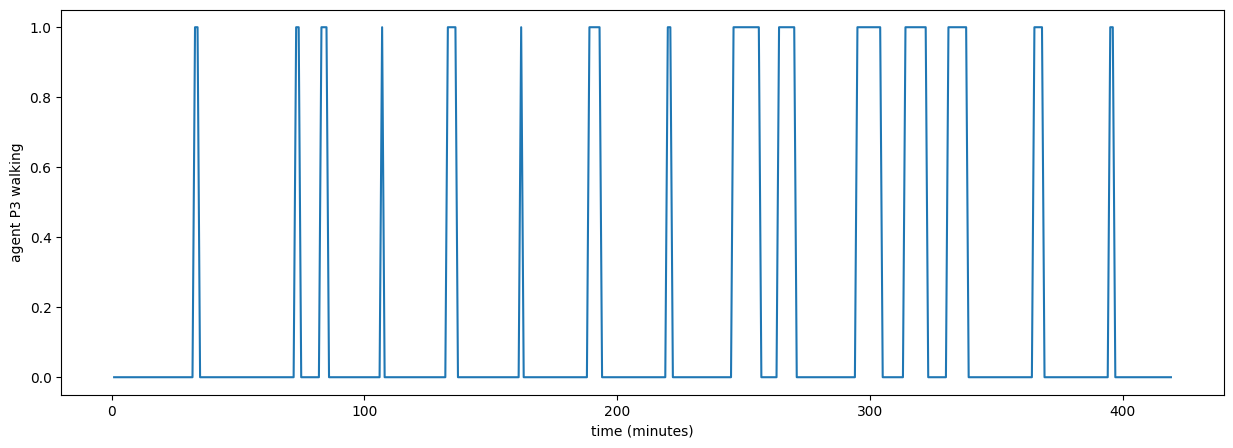

In [48]:
a_id='P3'
task=agents_data[(agents_data['atype']=='nurse') & (agents_data['AgentID']==a_id)]['state']=='walking'
ax=(task*1).plot(figsize=(15,5))
ax.set_ylabel('agent %s walking'%a_id)
ax.set_xlabel('time (minutes)')

In [49]:
agents_data[agents_data['atype']=='doctor'].groupby(['AgentID']).apply(avrg_time_per_state).groupby(level=1).mean()

state
documenting    27.375000
evaluating     24.109728
idle_doctor    24.625000
in-meeting     26.750000
walking         5.030556
dtype: float64

In [50]:
state_perc=agents_data.groupby(['atype','AgentID'])['state'].value_counts(normalize=True).groupby(['atype','state']).median().unstack()
state_perc

state,admitting,documenting,empty,evaluating,idle_doctor,idle_nurse,in-admission,in-evaluation,in-medication,in-meeting,medicating,ocupied,resting,taking-inventory,waiting-admission,waiting-evaluation,waiting-medication,walking
atype,,,,,,,,,,,,,,,,,,
bed,NaN,NaN,0.217288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.853291,NaN,NaN,NaN,NaN,NaN,NaN
cart,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doctor,NaN,0.121571,NaN,0.546539,0.135927,NaN,NaN,NaN,NaN,0.088095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144048
floor,NaN,NaN,0.057891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.942109,NaN,NaN,NaN,NaN,NaN,NaN
medication_station,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nurse,0.351889,0.045238,NaN,NaN,NaN,0.002381,NaN,NaN,NaN,0.084524,0.284524,NaN,NaN,0.086905,NaN,NaN,NaN,0.416667
nurse_station,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient,NaN,NaN,NaN,NaN,NaN,NaN,0.023593,0.072505,0.029461,NaN,NaN,NaN,0.11647,NaN,0.051115,0.060736,0.586629,NaN
room,NaN,NaN,0.256939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.858049,NaN,NaN,NaN,NaN,NaN,NaN


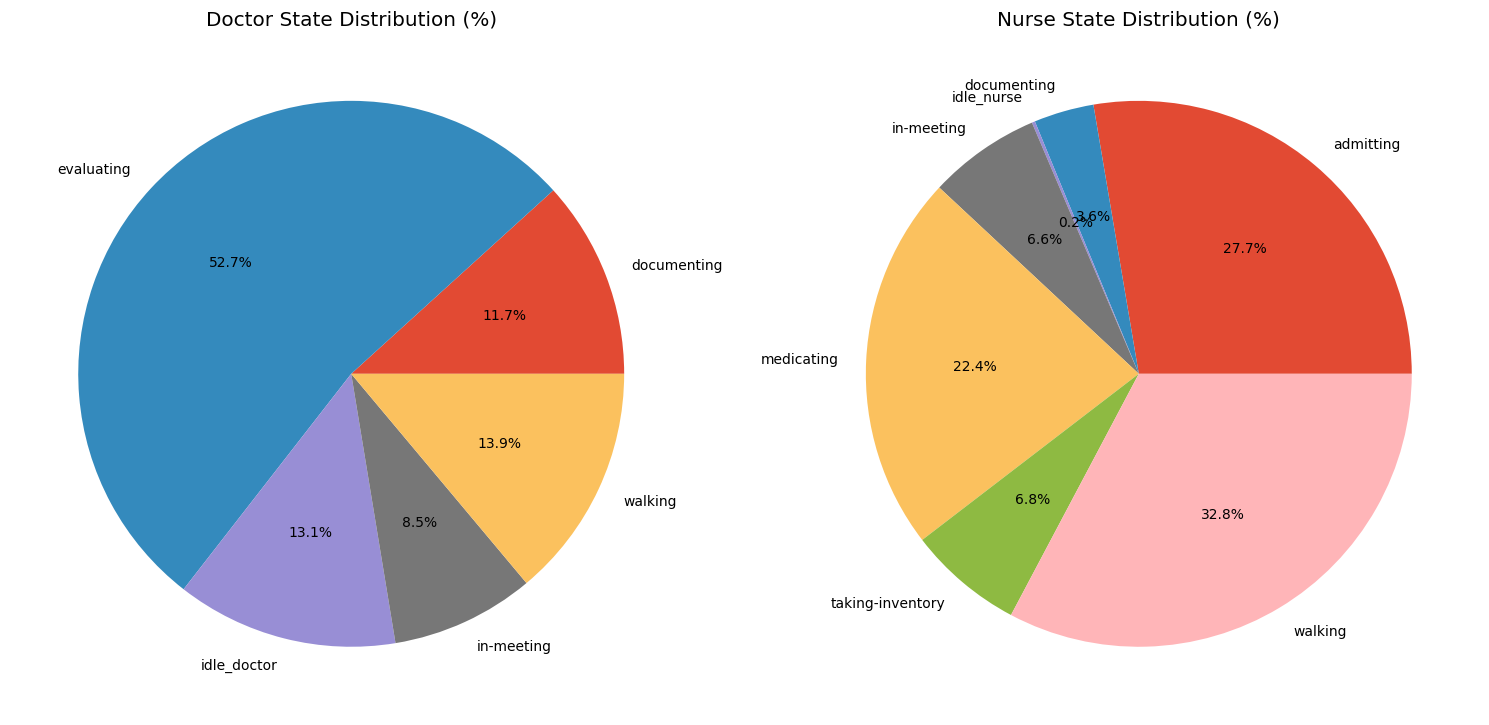

In [54]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig,axs=plt.subplots(1,2,figsize=(15,10))
for i, (atype, atype_info) in enumerate(state_perc.loc[['nurse','doctor']].dropna(how='all',axis=1).groupby(level=0,axis=0)):
    ax=axs[i]
    (atype_info.dropna(axis=1)*100).T.plot(kind='pie',stacked=True,ax=ax,subplots=True,legend=False,autopct='%.1f%%')
    ax.set_xlabel(""); ax.set_ylabel(""); ax.set_yticks([])
    ax.set_title("%s State Distribution (%%)"% atype.capitalize())
plt.tight_layout()

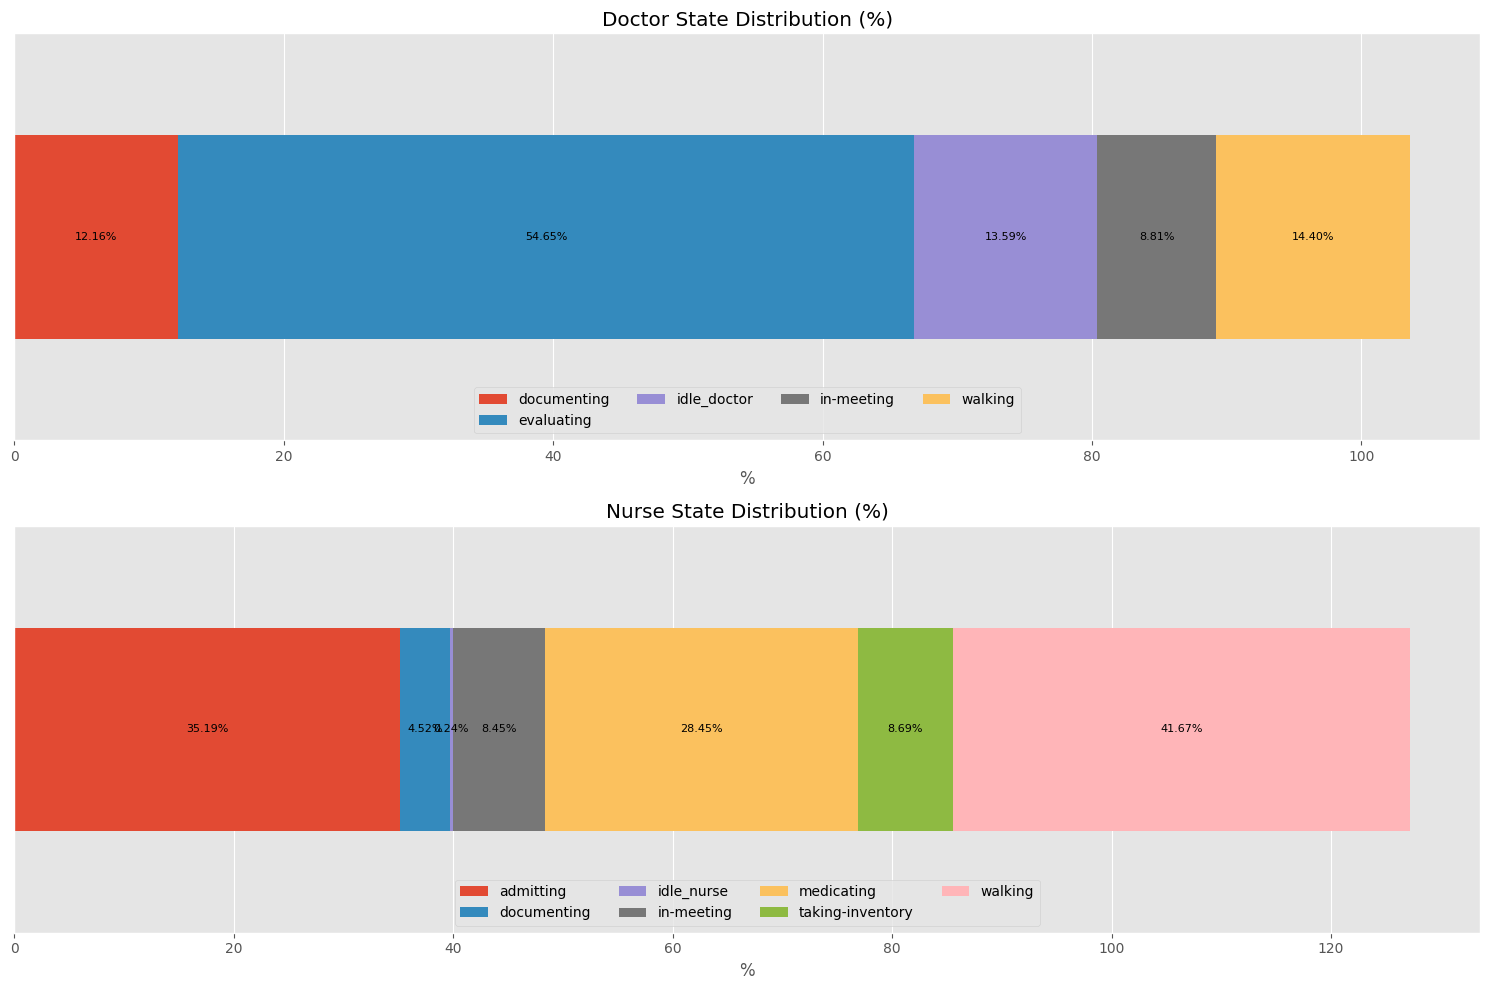

In [71]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig,axs=plt.subplots(2,1,figsize=(15,10))
for i, (atype,atype_info) in enumerate(state_perc.loc[['doctor','nurse']].dropna(how='all',axis=1).groupby(level=0,axis=0)):
    ax=axs[i]
    (atype_info.dropna(axis=1)*100).plot(kind='barh',stacked=True,ax=ax)
    for c in ax.containers:
        ax.bar_label(c, fmt=lambda x: f'{x:.2f}%' if x > 0 else '', label_type='center', size=8)
    ax.legend(ncols=4,loc='lower center')    
    ax.set_xlabel("%"); ax.set_ylabel(""); ax.set_yticks([])
    ax.set_title("%s State Distribution (%%)"% atype.capitalize())
plt.tight_layout()

Text(0, 0.5, 'Number of agents')

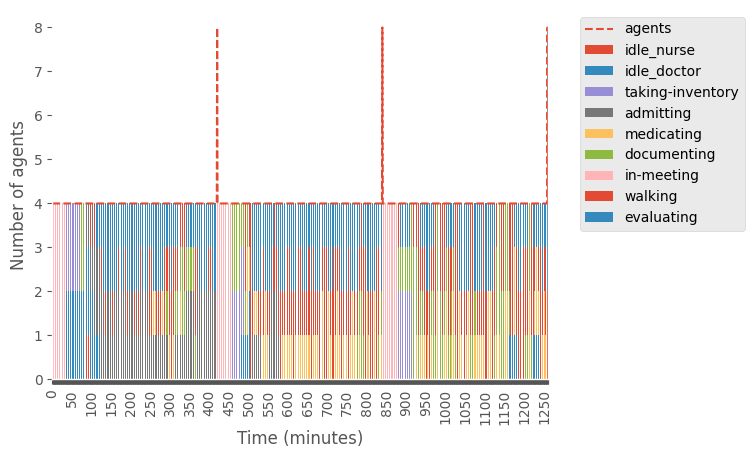

In [58]:
states=['idle_nurse','idle_doctor','taking-inventory','admitting','medicating','documenting','in-meeting','walking','evaluating']

ax=model_data[['nurse','doctor']].sum(axis=1).plot(style='--', label='agents')
model_data[states].plot(kind='bar',stacked=True,ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
n=50; [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
ax.set_xlabel('Time (minutes)'); ax.set_ylabel('Number of agents')

Text(0, 0.5, 'Number of agents')

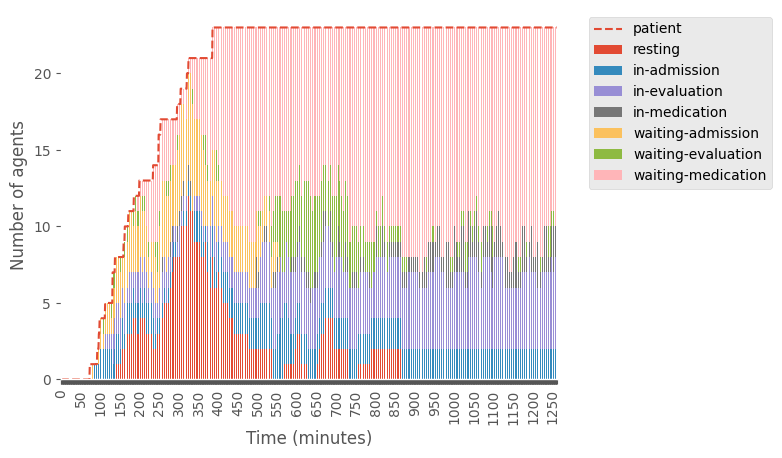

In [59]:
agent='patient'
states=['resting','in-admission','in-evaluation','in-medication','waiting-admission','waiting-evaluation','waiting-medication']

ax=model_data[[agent]].plot(style='--')
model_data[states].plot(kind='bar',stacked=True,ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
n=50; [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
ax.set_xlabel('Time (minutes)'); ax.set_ylabel('Number of agents')

# Priority queue implementation

In [141]:
import heapq

def repetitive_task():
    print("Repetitive Task executed")

def repetitive_task2():
    print("Repetitive Task 2 executed")

task_queue = []
def push(task_queue,task):
    heapq.heappush(task_queue, (1, 4, task))

push(task_queue,repetitive_task)
push(task_queue,repetitive_task2)

task_queue

TypeError: '<' not supported between instances of 'function' and 'function'

In [95]:
import heapq
import time

class PersonScheduler:
    def __init__(self, owner):
        self.task_queue = []  # Priority queue to manage tasks
        self.hold_next_action = 0  # Time to wait before executing next task
        self.hold_current_action = 0 # Time to wait before executing current task
        self.do_finish_task = False  # Flag to finish current task
        self.owner = owner
        self.dummy_counter = 0
        
    def add_scheduled_task(self, freq=0, execute_in=0, **task_kwargs):
        start_time = self.owner.steps + execute_in # Calculate the first scheduled time
        heapq.heappush(self.task_queue, (start_time, self.dummy_counter, freq, task_kwargs))  # Add the task with its frequency
        self.dummy_counter += 1

    def execute_schedule(self, current_time):
        """Execute next task if it's time to do so and there is no previous task in progress."""
        if self.do_finish_task: 
            self.owner.terminate_task()
            self.do_finish_task = False

        if self.hold_next_action or self.hold_current_action: # if there is a task in progress
            self.owner.execute_task()
            return None
        
        try: # if there is a task in the queue
            next_time, _, freq, task_kwargs = self.task_queue[0]
        except IndexError:
            return None

        if current_time >= next_time:
            self.owner.prepare_task(**task_kwargs)
            if not self.hold_current_action: # if task can start immediately
                heapq.heappop(self.task_queue)
                if freq > 0:
                    self.add_scheduled_task(freq=freq, execute_in=freq + next_time - current_time, **task_kwargs)
            self.owner.execute_task() # execute task
    
            

class Owner:
    def __init__(self):
        self.steps = 0
        self.loc = 0
        self.scheduler=PersonScheduler(self)
        self.set_idle()

    def set_idle(self):
        self.state='idle'
        self.path=[]

    def step(self):
        print('time', self.steps)
        self.scheduler.execute_schedule(self.steps)
        print('scheduler', self.scheduler.task_queue)
        print('   owner state', self.state, '\n')
        self.steps += 1

    def prepare_task(self, **kwargs):
        '''either hold the current task while walking or hold the next task while executing current'''
        route = kwargs['route'] if 'route' in kwargs else []
        if not route or self.compare_placement(route[-1]):
            print('prepare to execute')
            self.state=kwargs['action'] #self.model.action_state[kwargs['action']]
            self.scheduler.hold_next_action = kwargs['duration'] if 'duration' in kwargs else 0
            if route: self.do_interactions(with_=route[-1], mode="initiate")
        else:
            print('prepare to walk')
            self.find_path(route)
            self.state='walking'
            self.scheduler.hold_current_action = 1 # hold current task while walking

    def execute_task(self):
        if self.state=='walking':
            print('walking')
            self.loc=self.path.pop(0)
            print('loc:', self.loc, 'path:', self.path)
            if len(self.path)==0: 
                self.scheduler.do_finish_task=True
        elif self.state=='remove': 
            self.scheduler.do_finish_task=True
        else:
            print('executing task')
            self.scheduler.hold_next_action -= 1
            if self.scheduler.hold_next_action == 0: 
                self.scheduler.do_finish_task=True                  

    def terminate_task(self):
        if self.state=='walking':
            print("arrived at destination")
            print('loc:', self.loc, 'path:', self.path)
            self.scheduler.hold_current_action=0
            self.set_idle()
        elif self.state=='remove': #leaving
            print('removing')
            self.set_idle()
            self.scheduler.task_queue=[]
        else:
            print('finished task')
            self.do_interactions(mode="terminate")
            self.set_idle()

    def find_path(self, places):
        self.path=places.copy()
    
    def compare_placement(self, place):
        return self.loc==place
    
    def do_interactions(self, with_=None, mode=None):
        if mode=="initiate":
            print('initiating interaction')
        elif mode=="terminate":
            print('terminating interaction')

    
    


owner = Owner()
owner.scheduler.add_scheduled_task(action='remove', execute_in=20)
owner.scheduler.add_scheduled_task(action='do-document', route=[1], duration=2)
owner.scheduler.add_scheduled_task(execute_in=7, freq=3, action='do-document', route=[1,2], duration=1)
owner.scheduler.add_scheduled_task(execute_in=9, action='do-document', route=[1], duration=2)

for i in range(25):
    owner.step()

time 0
prepare to walk
walking
loc: 1 path: []
scheduler [(0, 1, 0, {'action': 'do-document', 'route': [1], 'duration': 2}), (9, 3, 0, {'action': 'do-document', 'route': [1], 'duration': 2}), (7, 2, 3, {'action': 'do-document', 'route': [1, 2], 'duration': 1}), (20, 0, 0, {'action': 'remove'})]
   owner state walking 

time 1
arrived at destination
loc: 1 path: []
prepare to execute
initiating interaction
executing task
scheduler [(7, 2, 3, {'action': 'do-document', 'route': [1, 2], 'duration': 1}), (9, 3, 0, {'action': 'do-document', 'route': [1], 'duration': 2}), (20, 0, 0, {'action': 'remove'})]
   owner state do-document 

time 2
executing task
scheduler [(7, 2, 3, {'action': 'do-document', 'route': [1, 2], 'duration': 1}), (9, 3, 0, {'action': 'do-document', 'route': [1], 'duration': 2}), (20, 0, 0, {'action': 'remove'})]
   owner state do-document 

time 3
finished task
terminating interaction
scheduler [(7, 2, 3, {'action': 'do-document', 'route': [1, 2], 'duration': 1}), (9, 3,

In [101]:
owner = Owner()
owner.scheduler.add_scheduled_task(action='remove', execute_in=20)
owner.scheduler.add_scheduled_task(action='do-document', route=[1], duration=2)
owner.scheduler.add_scheduled_task(execute_in=7, freq=3, action='do-document', route=[1,2], duration=1)
owner.scheduler.add_scheduled_task(execute_in=9, action='do-document', route=[1], duration=2)

In [105]:
next_time, _, interval, task_kwargs = owner.scheduler.task_queue[0]
current_time = 15 #time.time()
#owner.scheduler.execute_tasks(current_time)

## transfer of task_queues

In [106]:
owner2 = Owner()
owner2.scheduler.add_scheduled_task(action='remove', execute_in=30)
owner2.scheduler.task_queue.extend(owner.scheduler.task_queue)
owner2.scheduler.task_queue

[(30, 0, 0, {'action': 'remove'}),
 (0, 1, 0, {'action': 'do-document', 'route': [1], 'duration': 2}),
 (9, 3, 0, {'action': 'do-document', 'route': [1], 'duration': 2}),
 (7, 2, 3, {'action': 'do-document', 'route': [1, 2], 'duration': 1}),
 (20, 0, 0, {'action': 'remove'})]

# Floor manipulation: creating navigation grid (and initializing graph)

In [116]:
import mesa
import mesa_geo as mg
from shapely.geometry import Point, LineString
import geopandas as gpd
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd

class State(mg.GeoAgent):
    def __init__(self, unique_id, model, geometry, crs):
        super().__init__(unique_id, model, geometry, crs)
        if self.unique_id == 'path': self.atype = 'path'

class GeoModel(mesa.Model):
    def __init__(self):
        self.space = mg.GeoSpace(warn_crs_conversion=False)

        file_path=join ('..','data','floorplans','unisabana_hospital_%s.geojson')
        file_names=['floor','polygons']
        df_space = pd.concat((gpd.read_file(file_path%file) for file in file_names),ignore_index=True)
        space_agents = mg.AgentCreator(agent_class=State, model=self).from_GeoDataFrame(df_space)  
        self.space.add_agents(space_agents)
        self.walk=[]
        for agent in self.space.agents:
            if agent.atype != 'floor' and agent.atype!='room':
                self.walk.append(agent)

    def compare_path_bounds(self, path_bounds, start, end) -> bool:
        path_a, path_b = path_bounds
        return path_a.within(start.buffer(0.2)) and path_b.within(end.buffer(0.2))

In [117]:
m = GeoModel()
floor = [i for i in m.space.agents if i.atype == "floor"][0]

medic_room = [i for i in m.space.agents if i.atype == "medication_station"][0]
nurse_station = [i for i in m.space.agents if i.atype == "nurse_station"][0]

source = m.space.agents[20]#.geometry.centroid
target = m.space.agents[25]#.geometry.centroid

## geopandas

In [115]:
import geopandas as gpd
import pandas as pd
file_name=lambda file: '../data/floorplans/unisabana_hospital_%s.geojson'%file
df=pd.concat([gpd.read_file(file_name('floor')),gpd.read_file(file_name('polygons'))])#.set_crs('epsg:3857', allow_override=True)#.to_crs('epsg:3857')
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

<Figure size 640x480 with 0 Axes>

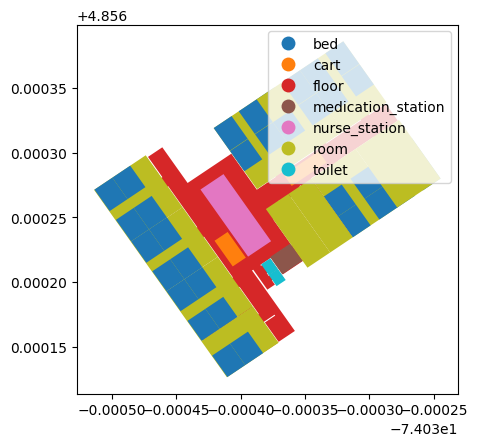

In [5]:
import matplotlib.pyplot as plt
fig=plt.figure()
df.plot(column="atype",legend=True)

## Cache paths (Do not override)

In [110]:
import pickle
with open("../data/paths/cache_paths.pkl", "rb") as cache_file:
    cache_paths = pickle.load(cache_file)

### get length of each step

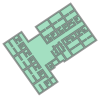

In [111]:
from shapely.geometry import Point
from math import sqrt

i=0
for direction, path in cache_paths.items():
    print(direction)
    step0=path[0]
    for step in path[1:]:
        step1=step
        print(step0,step1,sqrt(sum((step0-step1)**2)))
        step0=step
    break

(<POINT (-8241026.851 541243.876)>, <POINT (-8241031.455 541236.979)>)
[-8241026.80678852   541243.90699439] [-8241026.80678852   541243.72127322] 0.18572116864379495
[-8241026.80678852   541243.72127322] [-8241026.80678852   541243.53555205] 0.18572116864379495
[-8241026.80678852   541243.53555205] [-8241026.80678852   541243.34983088] 0.18572116864379495
[-8241026.80678852   541243.34983088] [-8241026.80678852   541243.16410971] 0.18572116852737963
[-8241026.80678852   541243.16410971] [-8241026.80678852   541242.97838854] 0.18572116864379495
[-8241026.80678852   541242.97838854] [-8241026.80678852   541242.79266737] 0.18572116864379495
[-8241026.80678852   541242.79266737] [-8241026.80678852   541242.60694621] 0.18572116864379495
[-8241026.80678852   541242.60694621] [-8241026.80678852   541242.42122504] 0.18572116864379495
[-8241026.80678852   541242.42122504] [-8241026.80678852   541242.23550387] 0.18572116852737963
[-8241026.80678852   541242.23550387] [-8241026.80678852   541242

### plot all paths starting or ending at given point

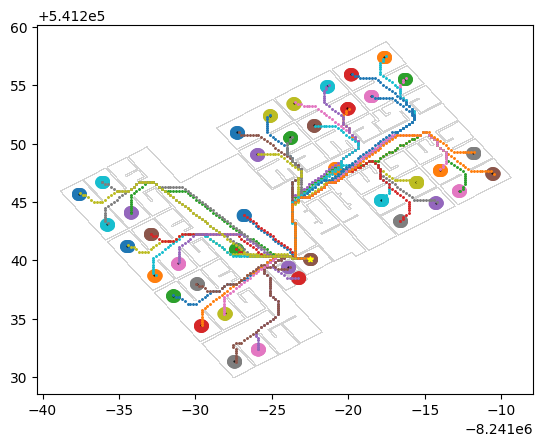

In [83]:
import numpy as np
ox,oy=np.array(floor.geometry.boundary.segmentize(max_segment_length=0.001).coords.xy)
plt.scatter(ox,oy,marker='.',linewidths=0.005, color='lightgray',s=1)


for space in m.walk:
    s=space.geometry.centroid
    s_near=s.buffer(0.2)
    plt.scatter(*s_near.exterior.xy,marker='o',linewidths=0.05,alpha=0.5)
    plt.scatter([s.x],[s.y],marker='.',color='black',s=1)


llegadas=[]
some_space=medic_room.geometry.centroid #source.geometry.centroid

for path_bounds, path in cache_paths.items():
    if path_bounds[0].within(some_space.buffer(0.2)):
        plt.scatter([x for x,_ in path],[y for _,y in path],marker='.',s=5)
        llegadas.append(path_bounds[1])
plt.scatter([some_space.x],[some_space.y],marker='*',color='yellow',s=15)


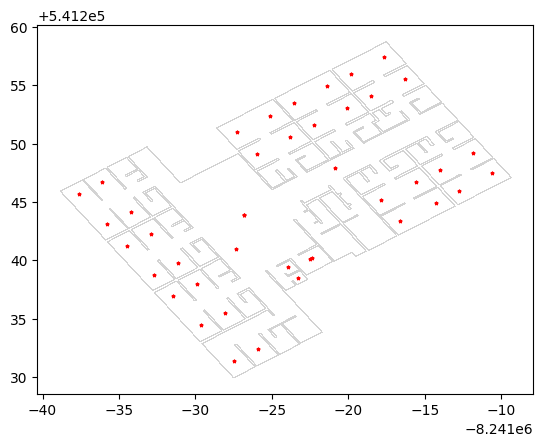

In [87]:
ox,oy=np.array(floor.geometry.boundary.segmentize(max_segment_length=0.001).coords.xy)
plt.scatter(ox,oy,marker='.',linewidths=0.005, color='lightgray',s=1)

for x in llegadas:
    plt.scatter([x.x],[x.y],marker='*',color='red',s=5)

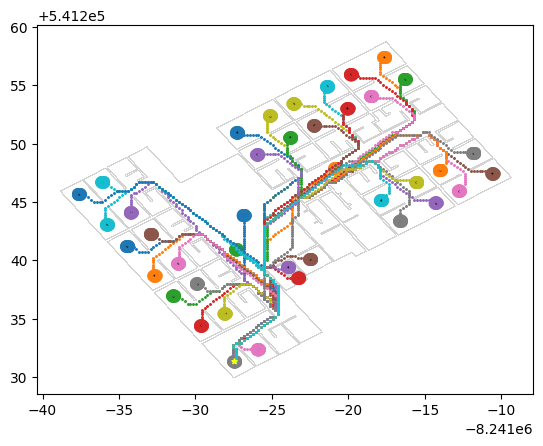

In [93]:
import numpy as np
ox,oy=np.array(floor.geometry.boundary.segmentize(max_segment_length=0.001).coords.xy)
plt.scatter(ox,oy,marker='.',linewidths=0.005, color='lightgray',s=1)

for space in m.walk:
    s=space.geometry.centroid
    s_near=s.buffer(0.2)
    plt.scatter(*s_near.exterior.xy,marker='o',linewidths=0.05,alpha=0.5)
    plt.scatter([s.x],[s.y],marker='.',color='black',s=1)


some_space=m.walk[7].geometry.centroid # medic_room.geometry.centroid #source.geometry.centroid
salidas=[]
for space in m.walk:
    found=False
    for path_bounds, path in cache_paths.items():
        if m.compare_path_bounds(path_bounds, space.geometry.centroid, some_space):
            plt.scatter([x for x,_ in path],[y for _,y in path],marker='.',s=5)
            salidas.append(path_bounds[0])
            found=True
    if not found: print('missing path to %s from %s'%(str(some_space.unique_id),str(space.unique_id)))

plt.scatter([some_space.x],[some_space.y],marker='*',color='yellow',s=15)

### plot all starting points

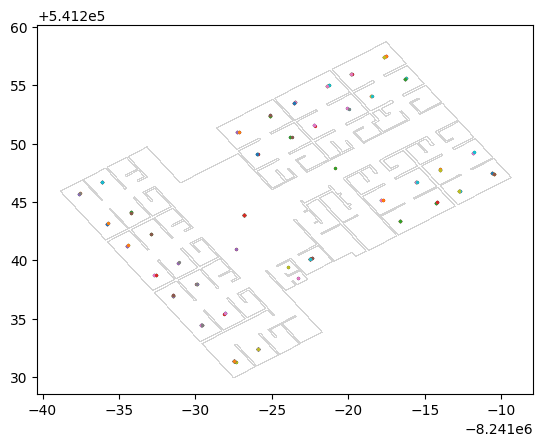

In [57]:
import numpy as np
ox,oy=np.array(floor.geometry.boundary.segmentize(max_segment_length=0.001).coords.xy)
plt.scatter(ox,oy,marker='.',linewidths=0.005, color='lightgray',s=1)

for (s,g), path in cache_paths.items():
    plt.scatter([s.x],[s.y],marker='.',s=7)

## Path finder:  D* object and inner bounds

In [58]:
%load_ext autoreload
%autoreload 2
from data_processing.FloorNavigation import DStarLite

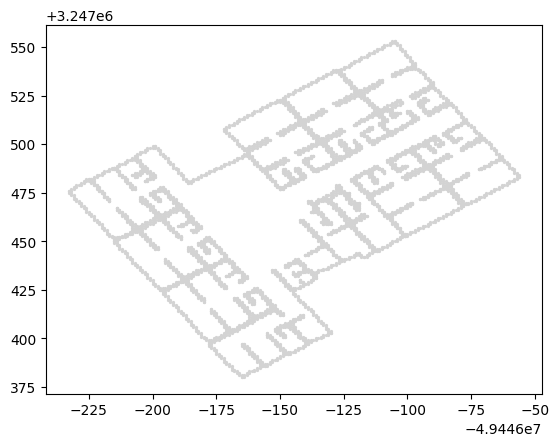

In [61]:
dstarlite = DStarLite(floor, zoom_factor=0.1)
plt.scatter(dstarlite.floor_PxlObject.ox, dstarlite.floor_PxlObject.oy, marker='.',s=7,color='lightgray')
plt.show()

Initializing
calculating path
Path found


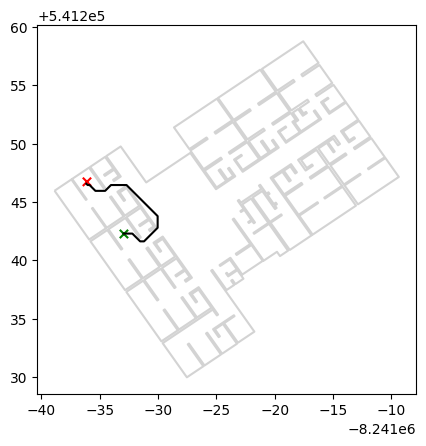

In [88]:
found_path, stepByStep_Path = dstarlite.main(source.geometry.centroid, target.geometry.centroid)

import matplotlib.pyplot as plt
from shapely.geometry import LineString

path=LineString(stepByStep_Path.tolist())
p = gpd.GeoSeries([floor.geometry.boundary, path, source.geometry.centroid, target.geometry.centroid])
p.plot(marker='x',color=['lightgray','k','g','r'])
plt.show()

In [89]:
import pickle

def get_path (from_agent, to_agent, cache_paths,dstarlite):
    # start and finish geo-points
    start=from_agent.geometry.centroid; end=to_agent.geometry.centroid

    # try to load path from cache
    for path_bounds, path in cache_paths.items():
        if m.compare_path_bounds(path_bounds, start, end): return path.tolist()

    # if not on cache: calculate shortest path
    print('calculating path to %s'%str(to_agent.unique_id))
    found_path, stepByStep_Path = dstarlite.main(start, end)
    if not found_path: raise NameError ('path not found from %s to %s'%(str(start),str(end)))
    
    # update cache of paths
    cache_paths[(start,end)] = stepByStep_Path
    cache_paths[(end,start)] = stepByStep_Path[::-1]
    with open("../data/paths/cache_paths.pkl", "wb") as cache_file:
        pickle.dump(cache_paths,cache_file)

    return stepByStep_Path.tolist()

In [ ]:
for space in m.walk:
    get_path (medic_room, space, cache_paths, dstarlite)

# Create PersonAgents from geo-dataframe

In [65]:
import pandas as pd
import random

n_agents=10
atype=['patient']*n_agents
location=random.sample(m.space.agents, n_agents)
state=['active']*n_agents
stop_active_at= [random.triangular(3,6) for _ in range(n_agents)]
df=pd.DataFrame(zip(atype,location,state,stop_active_at), columns=['atype','location_agent','state','stop_active_at'])
display(df.head())
gdf = gpd.GeoDataFrame(df, geometry=[x.geometry.centroid for x in df.location_agent], crs="EPSG:4326")
gdf

,atype,location_agent,state,stop_active_at
0,patient,<__main__.State object at 0x00000212BB911310>,active,3.973223
1,patient,<__main__.State object at 0x00000212BB99EBE0>,active,5.019420
2,patient,<__main__.State object at 0x00000212BBA09D90>,active,4.668921
3,patient,<__main__.State object at 0x00000212BB862550>,active,4.427574
4,patient,<__main__.State object at 0x00000212BB973F40>,active,4.638674


,atype,location_agent,state,stop_active_at,geometry
0,patient,<__main__.State object at 0x00000212BB911310>,active,3.973223,POINT (-8241022.24913 541251.56046)
1,patient,<__main__.State object at 0x00000212BB99EBE0>,active,5.019420,POINT (-8241027.33472 541240.95153)
2,patient,<__main__.State object at 0x00000212BBA09D90>,active,4.668921,POINT (-8241023.93071 541239.43630)
3,patient,<__main__.State object at 0x00000212BB862550>,active,4.427574,POINT (-8241015.54251 541246.70933)
4,patient,<__main__.State object at 0x00000212BB973F40>,active,4.638674,POINT (-8241025.01608 541250.03522)
5,patient,<__main__.State object at 0x00000212BB92C1C0>,active,5.095439,POINT (-8241032.67774 541238.70300)
6,patient,<__main__.State object at 0x00000212BBCBDE20>,active,3.602285,POINT (-8241019.51863 541243.85439)
7,patient,<__main__.State object at 0x00000212BB9BC850>,active,3.968998,POINT (-8241035.27246 541245.32504)
8,patient,<__main__.State object at 0x00000212BB911730>,active,3.888051,POINT (-8241023.79423 541250.52590)
9,patient,<__main__.State object at 0x00000212BB862F10>,active,4.728821,POINT (-8241011.81711 541249.20377)


## manipulate mesa-geo r_tree to filter agents

In [53]:
def get_relation_to_AgentCentroid(space, agent, relation, agent_type):
    """Return a list of related agents.

    Args:
        agent: the agent for which to compute the relation
        relation: must be one of 'intersects', 'within', 'contains',
            'touches'
        other_agents: A list of agents to compare against.
            Omit to compare against all other agents of the layer.
    """

    possible_agents = space._agent_layer._get_rtree_intersections(agent.geometry)
    for other_agent in possible_agents:
        if (
            getattr(agent.geometry.centroid, relation)(other_agent.geometry)
            and other_agent.unique_id != agent.unique_id
            and other_agent.atype == agent_type
        ):
            yield other_agent # this is a generator of all matches
            #return other_agent # return first match
    # if no match was found
    return None

In [108]:
some_bed=source
for x in m.space._agent_layer._get_rtree_intersections(some_bed.geometry):
    if (getattr(some_bed.geometry.centroid, 'within')(x.geometry)):
        print(x.atype, x.unique_id)

bed 20
room 9
floor 0
